In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
df=pd.read_csv("/home/vipin/sem-7/BTP/BTP Data-001/BTP Data/Rainfall Data/7Palakkad-Alathur_monthly.csv")
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import keras

Using TensorFlow backend.


In [4]:
import numpy as np
import math

In [5]:
df

,Year,Month,RF
0,1976,1,0.0
1,1976,2,0.0
2,1976,3,0.0
3,1976,4,200.0
4,1976,5,52.0
...,...,...,...
427,2011,8,405.1
428,2011,9,244.7
429,2011,10,177.1
430,2011,11,222.9


In [6]:
x = df.groupby(['Month']).mean()

In [7]:
grp = df.groupby('Month')
al = grp['RF'].agg([np.mean, np.std])

In [8]:
mnt = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

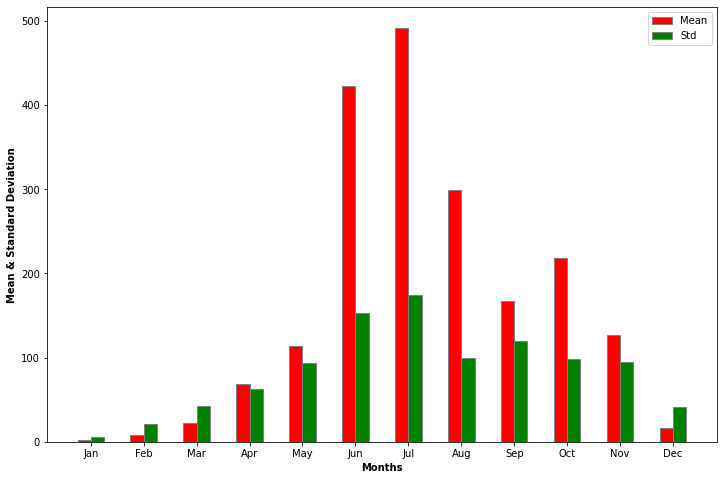

In [9]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
   
br1 = np.arange(len(al['mean'])) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, al['mean'], color ='r', width = barWidth, edgecolor ='grey', label ='Mean') 
plt.bar(br2, al['std'], color ='g', width = barWidth, edgecolor ='grey', label ='Std')    

plt.xlabel("Months", fontweight ='bold')
plt.ylabel('Mean & Standard Deviation', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(al['mean']))], mnt) 
plt.legend(('Mean', 'Std'))
plt.show() 

In [10]:
x = min(df.RF)
y = max(df.RF)
L1 = 0.10
L2 = 1.00
U = (x-L1,y+L2)

In [11]:
U

(-0.1, 890.5)

In [12]:
#partition
u = []
for i in range(1,31):
    a = U[0] + ((i-1)*((U[1]-U[0])/30))
    b = U[0] + ((i)*((U[1]-U[0])/30))
    u.append((a,b))

In [13]:
u

[(-0.1, 29.586666666666666),
 (29.586666666666666, 59.27333333333333),
 (59.27333333333333, 88.96000000000001),
 (88.96000000000001, 118.64666666666668),
 (118.64666666666668, 148.33333333333334),
 (148.33333333333334, 178.02),
 (178.02, 207.70666666666668),
 (207.70666666666668, 237.39333333333335),
 (237.39333333333335, 267.08),
 (267.08, 296.76666666666665),
 (296.76666666666665, 326.4533333333333),
 (326.4533333333333, 356.14),
 (356.14, 385.82666666666665),
 (385.82666666666665, 415.5133333333333),
 (415.5133333333333, 445.2),
 (445.2, 474.88666666666666),
 (474.88666666666666, 504.5733333333333),
 (504.5733333333333, 534.26),
 (534.26, 563.9466666666666),
 (563.9466666666666, 593.6333333333333),
 (593.6333333333333, 623.32),
 (623.32, 653.0066666666667),
 (653.0066666666667, 682.6933333333333),
 (682.6933333333333, 712.38),
 (712.38, 742.0666666666667),
 (742.0666666666667, 771.7533333333333),
 (771.7533333333333, 801.4399999999999),
 (801.4399999999999, 831.1266666666667),
 (831

In [14]:
rf = df["RF"].to_numpy().tolist()

In [15]:
u_new = []
for ux in u:
    c = 0
    for i in rf:
        if(i >= ux[0] and i <=ux[1]):
            c = 1
            break;
    if(c == 1):
        u_new.append(ux)
        

In [16]:
len(u_new)

28

In [17]:
u_new

[(-0.1, 29.586666666666666),
 (29.586666666666666, 59.27333333333333),
 (59.27333333333333, 88.96000000000001),
 (88.96000000000001, 118.64666666666668),
 (118.64666666666668, 148.33333333333334),
 (148.33333333333334, 178.02),
 (178.02, 207.70666666666668),
 (207.70666666666668, 237.39333333333335),
 (237.39333333333335, 267.08),
 (267.08, 296.76666666666665),
 (296.76666666666665, 326.4533333333333),
 (326.4533333333333, 356.14),
 (356.14, 385.82666666666665),
 (385.82666666666665, 415.5133333333333),
 (415.5133333333333, 445.2),
 (445.2, 474.88666666666666),
 (474.88666666666666, 504.5733333333333),
 (504.5733333333333, 534.26),
 (534.26, 563.9466666666666),
 (563.9466666666666, 593.6333333333333),
 (593.6333333333333, 623.32),
 (623.32, 653.0066666666667),
 (653.0066666666667, 682.6933333333333),
 (682.6933333333333, 712.38),
 (712.38, 742.0666666666667),
 (742.0666666666667, 771.7533333333333),
 (801.4399999999999, 831.1266666666667),
 (860.8133333333334, 890.5)]

In [18]:
#FIG value
DOM = []
for i in rf:
    for ux in u_new:
        if(i >= ux[0] and i <=ux[1]):
            fig = (i - ux[0])/(ux[1] - ux[0])
            DOM.append(fig)
            break

In [19]:
DOM

[0.003368515607455648,
 0.003368515607455648,
 0.003368515607455648,
 0.7403997305187511,
 0.7549966314843926,
 0.3992813833370758,
 0.9865259375701781,
 0.9845048282057037,
 0.6981810015719737,
 0.4212890186391199,
 0.9622726251964966,
 0.23916460812935098,
 0.003368515607455648,
 0.13810913990568155,
 0.03705367168201213,
 0.8055243655962273,
 0.9445317763305634,
 0.6458567258028299,
 0.14911295755670367,
 0.2836290141477661,
 0.11924545250392966,
 0.33887267011003824,
 0.5553559398158548,
 0.003368515607455648,
 0.003368515607455648,
 0.3233774983157422,
 0.003368515607455648,
 0.14866382214237595,
 0.9676622501684256,
 0.6058836739276896,
 0.6418145070738838,
 0.8479676622501688,
 0.4412755445766898,
 0.7446665169548622,
 0.9550864585672577,
 0.3233774983157422,
 0.003368515607455648,
 0.5760161688749158,
 0.03705367168201213,
 0.707388277565686,
 0.5129126431619132,
 0.9553110262744222,
 0.7222097462384941,
 0.9860768021558511,
 0.9782169324051199,
 0.46283404446440585,
 0.7152481

In [20]:
df["DOM"] = DOM

In [21]:
df

,Year,Month,RF,DOM
0,1976,1,0.0,0.003369
1,1976,2,0.0,0.003369
2,1976,3,0.0,0.003369
3,1976,4,200.0,0.740400
4,1976,5,52.0,0.754997
...,...,...,...,...
427,2011,8,405.1,0.649225
428,2011,9,244.7,0.246126
429,2011,10,177.1,0.969010
430,2011,11,222.9,0.511790


In [22]:
FIG = []
for dom in DOM:
    fig = -dom*(math.log2(dom))
    FIG.append(fig)

In [23]:
df["FIG"] = FIG

In [24]:
df

,Year,Month,RF,DOM,FIG
0,1976,1,0.0,0.003369,0.027668
1,1976,2,0.0,0.003369,0.027668
2,1976,3,0.0,0.003369,0.027668
3,1976,4,200.0,0.740400,0.321055
4,1976,5,52.0,0.754997,0.306119
...,...,...,...,...,...
427,2011,8,405.1,0.649225,0.404603
428,2011,9,244.7,0.246126,0.497798
429,2011,10,177.1,0.969010,0.044010
430,2011,11,222.9,0.511790,0.494582


In [25]:
dic = df.groupby('Month').groups
dic[1]

Int64Index([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
            156, 168, 180, 192, 204, 216, 228, 240, 252, 264, 276, 288, 300,
            312, 324, 336, 348, 360, 372, 384, 396, 408, 420],
           dtype='int64')

In [26]:
lst_jan = [df["FIG"][i] for i in dic[2]]

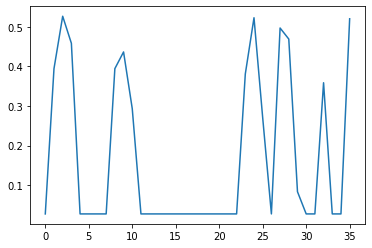

In [27]:
plt.plot(lst_jan)

In [28]:
FIG

[0.02766787997137116,
 0.02766787997137116,
 0.02766787997137116,
 0.3210548889681086,
 0.30611933904986455,
 0.5288570912589605,
 0.01930740996051401,
 0.02218071015197433,
 0.3618860605819941,
 0.5253970273182215,
 0.05338920186243724,
 0.4936176180364099,
 0.02766787997137116,
 0.3944561794684539,
 0.17616203628172455,
 0.2513234945167424,
 0.07776213154210415,
 0.40735083762550384,
 0.4093929748088327,
 0.5156157005308128,
 0.36584431440246445,
 0.5290428637160512,
 0.4712280518946739,
 0.02766787997137116,
 0.02766787997137116,
 0.5266877772654501,
 0.02766787997137116,
 0.4088068520410564,
 0.045890911284489966,
 0.4379855910416633,
 0.4106147552890122,
 0.20174748856458316,
 0.5208147110079668,
 0.3167316941398514,
 0.0633191346829773,
 0.5266877772654501,
 0.02766787997137116,
 0.4584044882007342,
 0.17616203628172455,
 0.35328794452729095,
 0.49404513162067343,
 0.06301000199043535,
 0.339084846200074,
 0.01994643779387793,
 0.031081529992015064,
 0.5144090800198556,
 0.345811

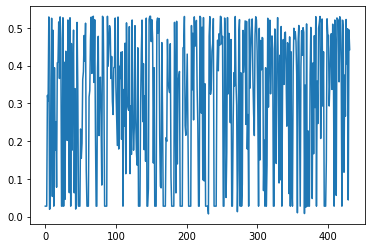

In [29]:
plt.plot(FIG)

In [30]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [31]:
adf_test(FIG)

Results of Dickey-Fuller Test:
Test Statistic                  -4.607520
p-value                          0.000125
#Lags Used                      18.000000
Number of Observations Used    413.000000
Critical Value (1%)             -3.446283
Critical Value (5%)             -2.868564
Critical Value (10%)            -2.570511
dtype: float64


In [32]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [33]:
kpss_test(FIG)

Results of KPSS Test:
Test Statistic            0.585417
p-value                   0.023962
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [34]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [35]:
lag_acf = acf(FIG, nlags=100)
lag_pacf = pacf(FIG, nlags=100, method='ols')

0.09430054396763887


array([ 1.        ,  0.15685946,  0.10549242, -0.09008284, -0.05630915,
       -0.14748606, -0.06648822, -0.06919714, -0.02777198, -0.11300842,
        0.08146406,  0.15874746,  0.25997828,  0.12785165,  0.09190413,
       -0.05259237, -0.07238695, -0.06913832, -0.08881624, -0.18282571,
       -0.14802431, -0.12100688,  0.1047604 ,  0.1557819 ,  0.27291795,
        0.18003682,  0.07965688, -0.07246483, -0.06712609, -0.08934955,
       -0.09581986, -0.0825896 , -0.1021167 , -0.10799496,  0.06393629,
        0.11864064,  0.2554703 ,  0.17987067,  0.1151698 , -0.03298643,
       -0.07830033, -0.08381354, -0.11329233, -0.04620347, -0.15772448,
        0.0254249 ,  0.04931708,  0.15856358,  0.18132238,  0.1876472 ,
       -0.00894284, -0.01086442, -0.08870764, -0.05388263, -0.06699331,
       -0.06250907, -0.10732934, -0.06547849,  0.01569401,  0.13919431,
        0.1892429 ,  0.16692638,  0.08902438, -0.0269419 , -0.13364253,
       -0.12555048, -0.09771732, -0.07910779, -0.08584488, -0.05

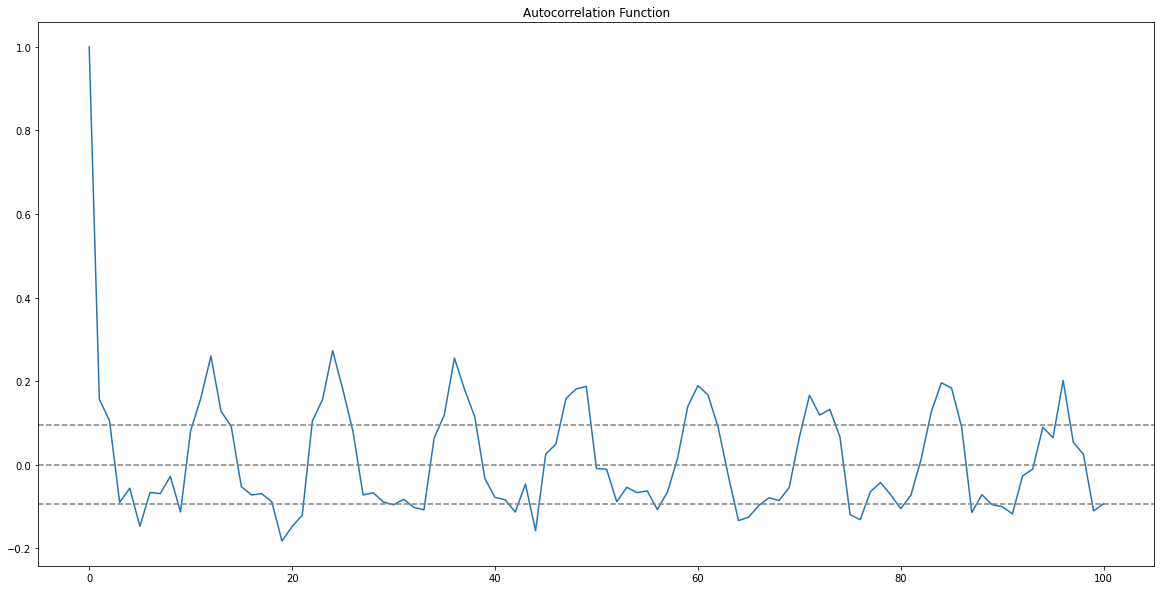

In [36]:
#p = 68

#Plot ACF: 
#plt.subplot(121)
plt.figure(figsize = (20,10))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(FIG)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(FIG)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
print(1.96/np.sqrt(len(FIG)))
lag_acf

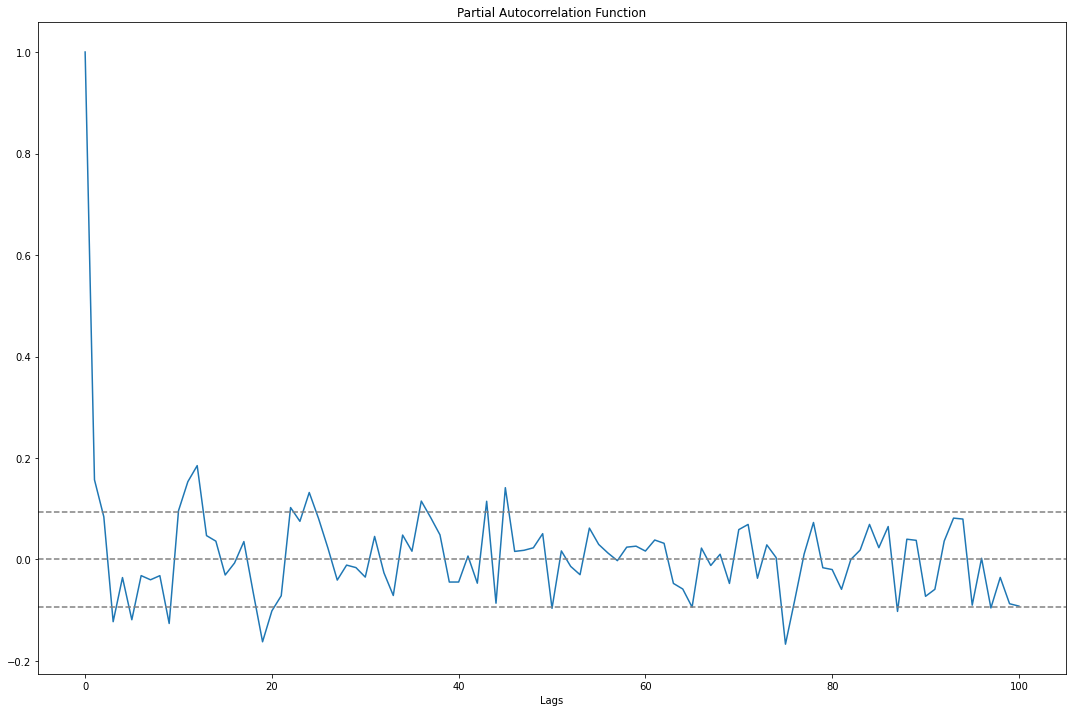

In [37]:
#q = 17

#Plot PACF:
plt.figure(figsize = (15,10))
plt.plot(lag_pacf)
plt.xlabel('Lags')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(FIG)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(FIG)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
#plt.xlim(0, 40)
#plt.ylim(-0.1, 0.2)
#plt.annotate('Inside 99% confidence interval at lag = 16 ', xy=(16, -0.006634360150502235), xytext=(15 , -0.04),
         #    arrowprops=dict(facecolor='black',shrink=1),
          #   )
plt.tight_layout()


In [38]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(FIG, order=(40, 0, 0))
results_AR = model.fit(disp=1)

KeyboardInterrupt: 

In [31]:
fitted_FIG = results_AR.fittedvalues

In [32]:
fitted_FIG

array([ 0.30285846,  0.26382043,  0.24430113,  0.26918565,  0.31610749,
        0.36735295,  0.37177046,  0.3296931 ,  0.23618243,  0.34944759,
        0.36526589,  0.29851824,  0.21607012,  0.21676796,  0.15640362,
        0.36470302,  0.32454955,  0.29906805,  0.20029048,  0.38100062,
        0.36900772,  0.45714185,  0.32041032,  0.27193146,  0.10907409,
        0.25549622,  0.2661872 ,  0.31426253,  0.27099596,  0.36226553,
        0.25709391,  0.36357957,  0.30218471,  0.43868792,  0.29802151,
        0.28176455,  0.22813588,  0.25449636,  0.08334482,  0.31884673,
        0.22801239,  0.30779278,  0.36590985,  0.37301921,  0.32253167,
        0.32652538,  0.29427254,  0.39836976,  0.15857139,  0.27781552,
        0.21449887,  0.20275415,  0.2982362 ,  0.33169829,  0.29271424,
        0.29564391,  0.37204663,  0.41510028,  0.27477437,  0.22215133,
        0.12640666,  0.24914698,  0.28994067,  0.39649412,  0.31731803,
        0.24281861,  0.31546897,  0.35909308,  0.39266509,  0.35

In [37]:
model.score([10,20])

array([nan, nan])

In [33]:
import numpy as np
Array = np.array(fitted_FIG) 
  
# Displaying the array 
print('Array:\n', Array) 
file = open("Fitted_FIG.txt", "w+") 
  
# Saving the array in a text file 
content = str(Array) 
file.write(content) 
file.close()

Array:
 [ 0.30285846  0.26382043  0.24430113  0.26918565  0.31610749  0.36735295
  0.37177046  0.3296931   0.23618243  0.34944759  0.36526589  0.29851824
  0.21607012  0.21676796  0.15640362  0.36470302  0.32454955  0.29906805
  0.20029048  0.38100062  0.36900772  0.45714185  0.32041032  0.27193146
  0.10907409  0.25549622  0.2661872   0.31426253  0.27099596  0.36226553
  0.25709391  0.36357957  0.30218471  0.43868792  0.29802151  0.28176455
  0.22813588  0.25449636  0.08334482  0.31884673  0.22801239  0.30779278
  0.36590985  0.37301921  0.32253167  0.32652538  0.29427254  0.39836976
  0.15857139  0.27781552  0.21449887  0.20275415  0.2982362   0.33169829
  0.29271424  0.29564391  0.37204663  0.41510028  0.27477437  0.22215133
  0.12640666  0.24914698  0.28994067  0.39649412  0.31731803  0.24281861
  0.31546897  0.35909308  0.39266509  0.35110937  0.27854768  0.27814518
  0.1664778   0.21352447  0.23715992  0.24215571  0.36291993  0.35978478
  0.37504002  0.39327462  0.34795945  0.377

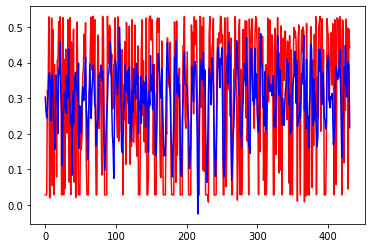

In [38]:
import matplotlib.pyplot as plt
plt.plot(FIG , 'r')
plt.plot(fitted_FIG , 'b')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(FIG, fitted_FIG, squared=False)

In [40]:
rms

0.1638539888738206

In [39]:
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Year', ylabel='FIG'>

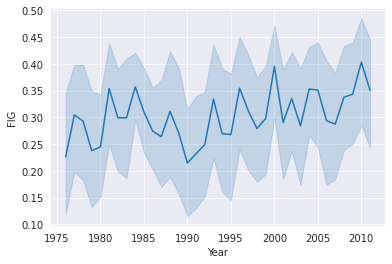

In [40]:
sns.lineplot(x="Year", y="FIG",legend = 'full' , data=df)

<AxesSubplot:xlabel='Year', ylabel='FIG'>

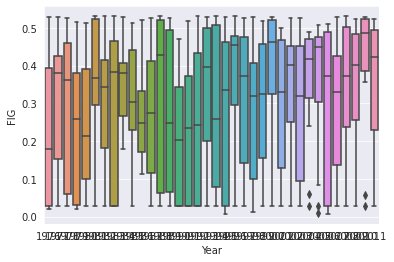

In [47]:
sns.boxplot(x="Year", y="FIG" , data=df)

<Figure size 432x288 with 0 Axes>

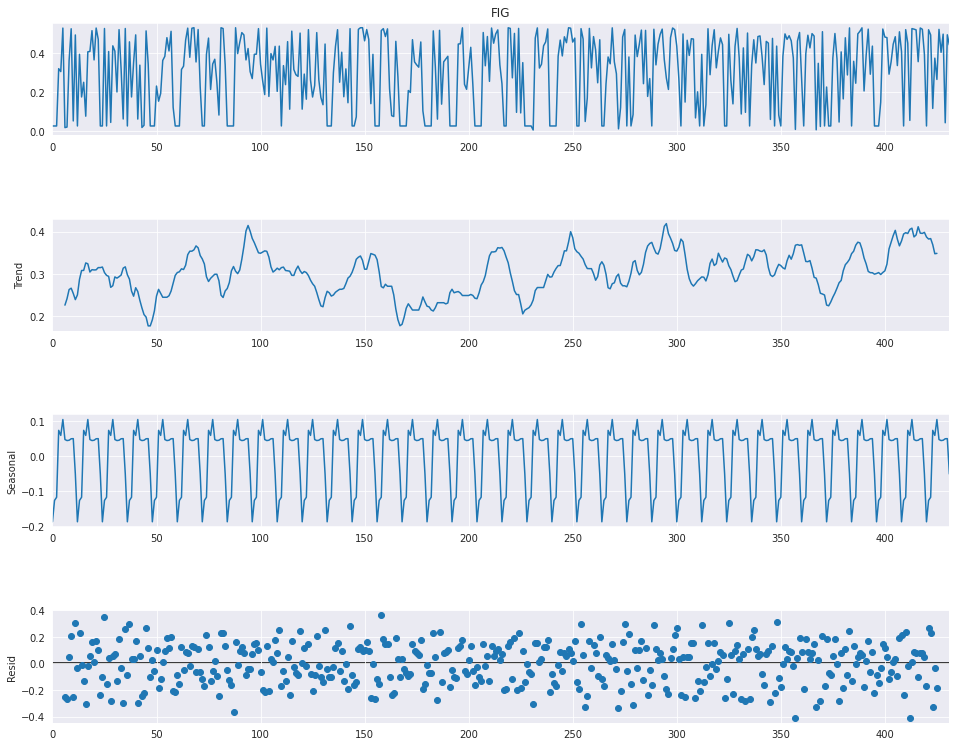

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['FIG'], model='additive', freq=12)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [42]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

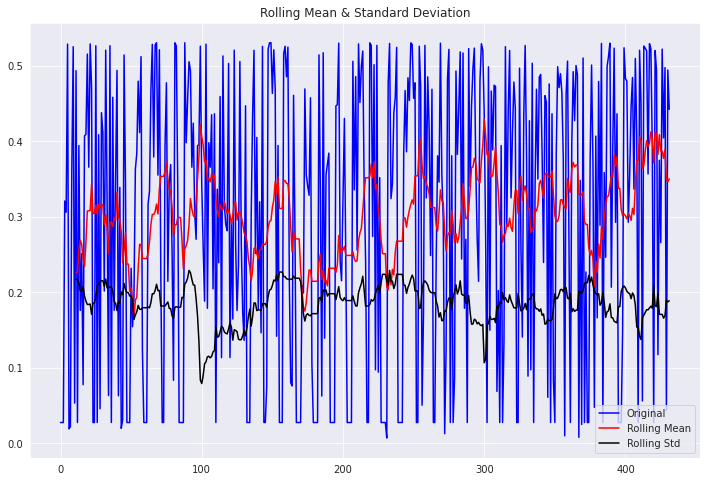

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.101379
p-value                          0.000014
#Lags Used                      20.000000
Number of Observations Used    411.000000
Critical Value (1%)             -3.446361
Critical Value (5%)             -2.868598
Critical Value (10%)            -2.570530
dtype: float64


In [43]:
test_stationarity(df['FIG'])

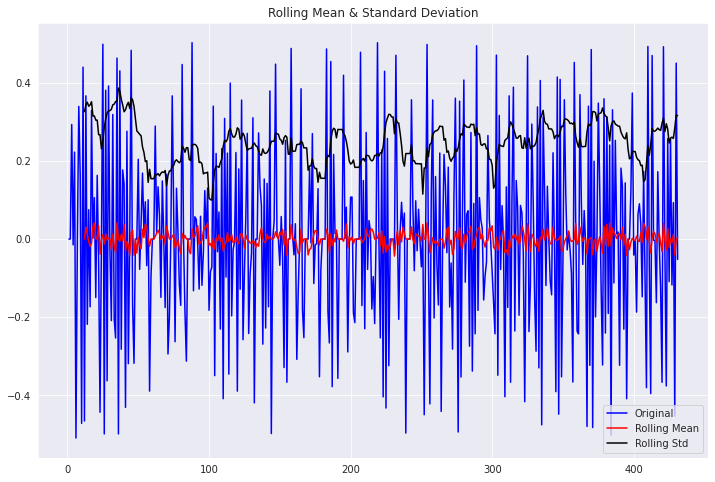

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.643197e+00
p-value                        5.345486e-09
#Lags Used                     2.000000e+01
Number of Observations Used    4.100000e+02
Critical Value (1%)           -3.446401e+00
Critical Value (5%)           -2.868615e+00
Critical Value (10%)          -2.570539e+00
dtype: float64


In [44]:
first_diff = df.FIG - df.FIG.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

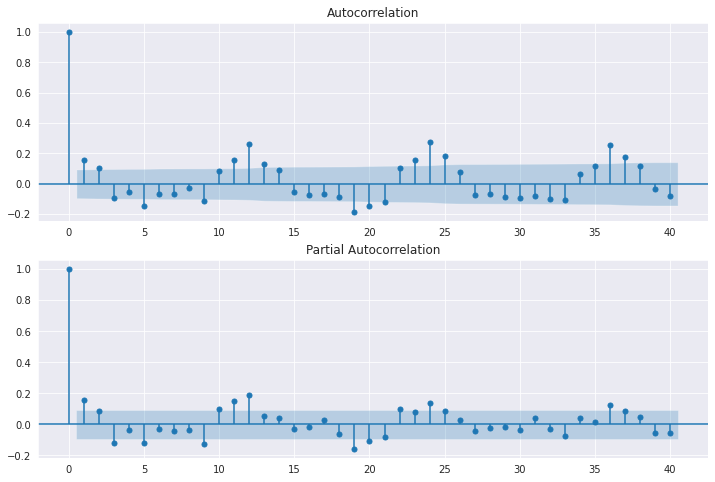

In [45]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.FIG, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.FIG, lags=40, ax=ax2)# , lags=40

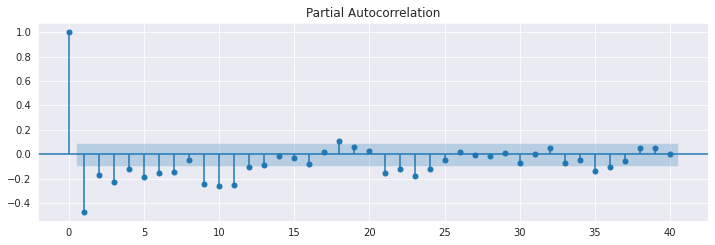

In [46]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

In [47]:
#FROM PACF = lag = 8

In [48]:
model2 = sm.tsa.ARIMA(FIG, order=(8, 1, 0)).fit(disp = 1)

In [49]:
fitted_FIG = model2.fittedvalues

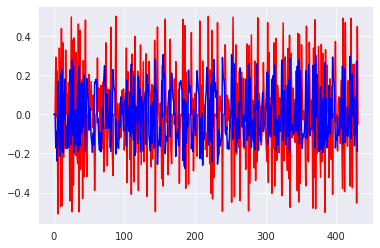

In [51]:
import matplotlib.pyplot as plt
plt.plot(first_diff , 'r')
plt.plot(fitted_FIG , 'b')
plt.show()

In [57]:
len(fitted_FIG)

433

In [58]:
D = [first_diff , fitted_FIG[:432]]
fitted_FIG = np.append(fitted_FIG , 0)

<AxesSubplot:>

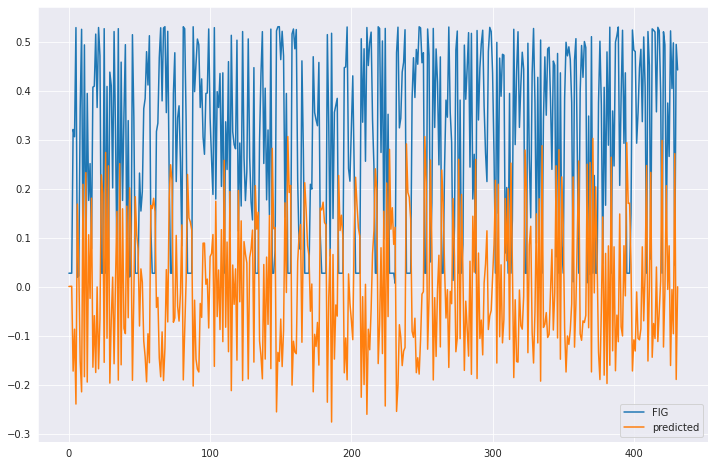

In [60]:
df["predicted"] = fitted_FIG[:432]
df[['FIG', 'predicted']].plot(figsize=(12, 8))

In [148]:
df[['FIG', 'predicted']]

,FIG,predicted
0,0.027668,0.000598
1,0.027668,0.000880
2,0.027668,0.001031
3,0.321055,-0.172081
4,0.306119,-0.086585
...,...,...
427,0.404603,-0.005782
428,0.497798,-0.095827
429,0.044010,0.271650
430,0.494582,-0.189185


In [61]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(FIG, fitted_FIG+0.26, squared=False)
rms

ValueError: Found input variables with inconsistent numbers of samples: [432, 434]

In [159]:
best_xl

0.30189999999998307

NormaltestResult(statistic=67.90952600026665, pvalue=1.7932209114846565e-15)


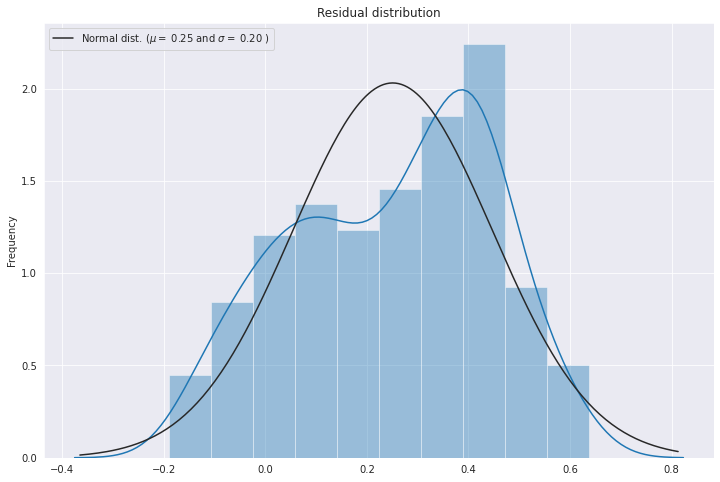

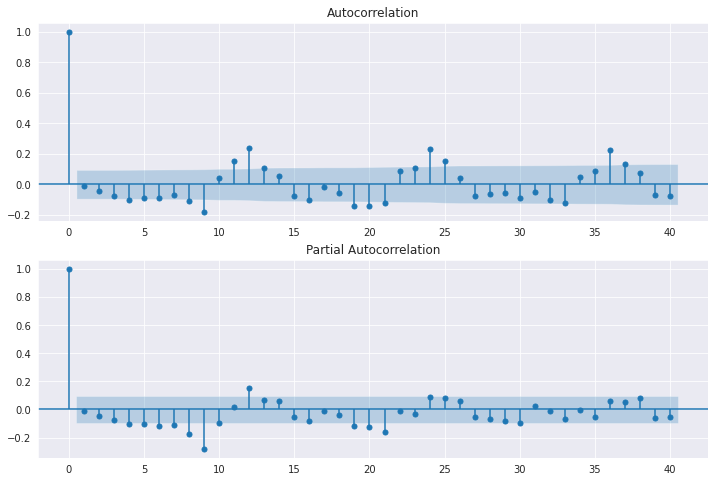

In [79]:
from scipy import stats
from scipy.stats import normaltest

resid = model2.resid+0.25
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(model2.resid+0.25, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(model2.resid+0.25, lags=40, ax=ax2)


In [46]:
def fig_to_dom(y):
    m_l = 100000
    x = 0.001
    X = 0
    while(x < 1):
        y1 = -x* math.log2(x)
        al = (y - y1)**2
        th = K.minimum(al,m_l)
        X = K.switch((th == al),x,X)
        #if(al < m_l):
            #m_l = al
            #X = x
        x = x+ 0.001
    return X

In [48]:
import tensorflow as tf
#import keras.backend as K

In [49]:
######### new implemention

In [ ]:
#making x and y
x = []
y = []
rf = df['RF'].tolist()
for i in range(len(FIG)):
    #print(i)
    if(i+11 >= len(FIG)):
        break
    the = FIG[i:i+10]
    x.append(the)
    y.append(rf[i+10])

In [ ]:
x = np.array(x)

In [ ]:
def FIG_to_DOM(y):
    return (0.423287 - (3.27608*math.pow(10, -13)*K.sqrt(1669400067654166916366336 - 3229136854392527740993536*y)))
    print(y)
    return y

In [43]:
def keras_custom_loss_function(y_actual, y_predicted):
    set_no = np.argmax(y_predicted)
    a,b = u_new[set_no]
    dom = FIG_to_DOM(y_predicted[set_no])
    rainfall = (dom*(b-a)) + a
    return (rainfall - y_actual)**2

In [44]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense# Neural network
from keras import Model, Input
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(28, activation='sigmoid'))

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [450]:
model.compile(optimizer='adam', loss=keras_custom_loss_function , metrics = ['accuracy'])

In [451]:
model.fit(x,y, batch_size=10, epochs=50, verbose=1, shuffle=False)

Epoch 1/50
421/421 [==============================] - 0s 604us/step - loss: 58322.9342 - accuracy: 0.0000e+00
Epoch 2/50
421/421 [==============================] - 0s 88us/step - loss: 57999.1835 - accuracy: 0.0000e+00
Epoch 3/50
421/421 [==============================] - 0s 86us/step - loss: 57821.2260 - accuracy: 0.0000e+00
Epoch 4/50
421/421 [==============================] - 0s 83us/step - loss: 57735.1221 - accuracy: 0.0000e+00
Epoch 5/50
421/421 [==============================] - 0s 86us/step - loss: 57716.8152 - accuracy: 0.0000e+00
Epoch 6/50
421/421 [==============================] - 0s 81us/step - loss: 57714.0870 - accuracy: 0.0000e+00
Epoch 7/50
421/421 [==============================] - 0s 84us/step - loss: 57712.8183 - accuracy: 0.0000e+00
Epoch 8/50
421/421 [==============================] - 0s 84us/step - loss: 57711.8149 - accuracy: 0.0000e+00
Epoch 9/50
421/421 [==============================] - 0s 84us/step - loss: 57710.6651 - accuracy: 0.0000e+00
Epoch 10/50
421/42

In [377]:
FIG

[0.02766787997137116,
 0.02766787997137116,
 0.02766787997137116,
 0.3210548889681086,
 0.30611933904986455,
 0.5288570912589605,
 0.01930740996051401,
 0.02218071015197433,
 0.3618860605819941,
 0.5253970273182215,
 0.05338920186243724,
 0.4936176180364099,
 0.02766787997137116,
 0.3944561794684539,
 0.17616203628172455,
 0.2513234945167424,
 0.07776213154210415,
 0.40735083762550384,
 0.4093929748088327,
 0.5156157005308128,
 0.36584431440246445,
 0.5290428637160512,
 0.4712280518946739,
 0.02766787997137116,
 0.02766787997137116,
 0.5266877772654501,
 0.02766787997137116,
 0.4088068520410564,
 0.045890911284489966,
 0.4379855910416633,
 0.4106147552890122,
 0.20174748856458316,
 0.5208147110079668,
 0.3167316941398514,
 0.0633191346829773,
 0.5266877772654501,
 0.02766787997137116,
 0.4584044882007342,
 0.17616203628172455,
 0.35328794452729095,
 0.49404513162067343,
 0.06301000199043535,
 0.339084846200074,
 0.01994643779387793,
 0.031081529992015064,
 0.5144090800198556,
 0.345811

In [379]:
te = np.array(FIG[422:432])

In [383]:
te = te.reshape((1,10))

In [385]:
ggg= model.predict(te)

In [446]:
ggg

array([[0.5495658 , 0.5498016 , 0.5202367 , 0.5307653 , 0.52450436,
        0.52360016, 0.5316332 , 0.52274156, 0.5641766 , 0.53340256,
        0.53540397, 0.53214544, 0.5284574 , 0.55939615, 0.52074915,
        0.53045875, 0.5537414 , 0.57034695, 0.56770766, 0.5567673 ,
        0.5371341 , 0.53209925, 0.5380812 , 0.5381011 , 0.52472985,
        0.532509  , 0.5363783 , 0.5349514 ]], dtype=float32)

In [397]:
ggg[0][17]

0.57034695

In [399]:
arg = np.argmax(ggg)

In [402]:
yu = ggg[0][arg]

In [444]:
yu = 0.57034695

In [445]:
1669400067654166916366336 - 3229136854392527740993536*yu

-1.7232828838120554e+23

In [404]:
ww = (0.423287 - (3.27608*math.pow(10, -13)*math.sqrt(1669400067654166916366336 - 3229136854392527740993536*yu)))


ValueError: math domain error

In [401]:
a,b = u_new[arg]
dom = FIG_to_DOM(ggg[0][arg])
rainfall = (dom*(b-a)) + a

AttributeError: 'float' object has no attribute 'dtype'

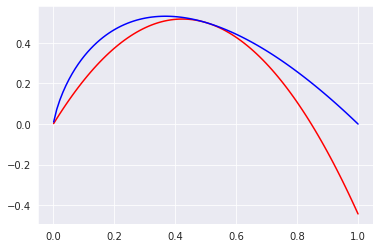

In [192]:
x = np.linspace(0.001,1,100)
y1 = (-x/math.log(2))*(math.log(0.5) + (x-0.5)/0.5)
y2 = -x*np.log2(x)
plt.plot(figsize = (20,12))
plt.plot(x,y1 , 'r')
plt.plot(x,y2 , 'b')
plt.show()

In [183]:
math.log(2)

0.6931471805599453

In [203]:
xx = (0.423287 - (3.27608*math.pow(10, -13)*np.sqrt(1669400067654166916366336 - 3229136854392527740993536*yy)))
plt.plot(yy,x)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

In [201]:
rr = np.sqrt(1669400067654166916366336 - 3229136854392527740993536*x)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

In [202]:
rr = np.sqrt(x)